# Object Detection Training with IMAGE AI

### Mount your Google Drive 

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Download the Required ML packages

In [ ]:
!pip install tensorflow-gpu==2.4.0

!pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0

     |████████████████████████████████| 394.7MB 40kB/s 
     |████████████████████████████████| 14.9MB 121kB/s 
     |████████████████████████████████| 2.1MB 52.8MB/s 
     |████████████████████████████████| 11.6MB 49.6MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=41bdc2cb025433a79668d0052afb6f69625e470f445c7c2c8bf4e2913353004b
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bokeh 2.3.0 has requirement pillow>=7.1.0, but you'll have pillow 7.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing inst

### Installing Imageai and Retrieving File Structure from Google Drive/ Github

In the first line, we import the ImageAI model training class, then we define the model trainer in the second line, we set the network type in the third line and set the path to the image dataset we want to train the network on.



In [ ]:
#### OBJECT DETECTION

# Use the Sudo's before to clear created folders
# !sudo rm -r datasets_objs/
# !sudo rm -r models/
# !sudo rm -r configs/

!pip install imageai --upgrade


# Copy datasets_objs to Drive
# !cp -r datasets_objs drive/MyDrive/ML_dataset/datasets_objs 

# Remove datasets_objs from Drive and Google Collab
# !sudo rm -r drive/MyDrive/ML_dataset/datasets_objs
# !sudo rm -r datasets_objs

# Copy our file from google drive
!cp -r drive/MyDrive/ML_dataset/datasets_objs datasets_objs


# Getting a copy of trains for validation
# !cp -r datasets_objs/train datasets_objs/validation


# Copy of all models
!cp -r drive/MyDrive/ML_dataset/models models

# From Github
git clone

Requirement already up-to-date: imageai in /usr/local/lib/python3.7/dist-packages (2.1.6)



## Train the Model
- In the first line, we import the ImageAI detection model training class, - then we define the model trainer in the second line, 
- we set the network type in the third line and set the path to the image dataset we want to train the network on.

In [ ]:
# We are going to perform Custom Object Detection
# https://imageai.readthedocs.io/en/latest/customdetection/
# https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Detection/Custom/CUSTOMDETECTIONTRAINING.md

#############################################################################
##### DO NOT RUN UNLES YOU ARE TRAINING A NEW MODEL !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
# trainer.setModelTypeAsResNet50() # Yolo gave Nans, It worked on Second Try
trainer.setDataDirectory(data_directory="datasets_objs")
# The More the num_experiments the better the model

# The Pretrained YOLO model (Use this for an initial training )
# trainer.setTrainConfig(object_names_array=["building"], batch_size=4, num_experiments=100, train_from_pretrained_model="models/pretrained-yolov3.h5")

# The best model so far
trainer.setTrainConfig(object_names_array=["building"], batch_size=4, num_experiments=100, train_from_pretrained_model="models/best_model_so_far.h5")
# In the above,when training for detecting multiple objects,
#set object_names_array=["object1", "object2", "object3",..."objectz"]
trainer.trainModel()
#############################################################################




Generating anchor boxes for training images and annotation...
[Errno 21] Is a directory: 'datasets_objs/train/annotations/.ipynb_checkpoints'
Ignore this bad annotation: datasets_objs/train/annotations/.ipynb_checkpoints
Average IOU for 9 anchors: 0.82
Anchor Boxes generated.
Detection configuration saved in  datasets_objs/json/detection_config.json
[Errno 21] Is a directory: 'datasets_objs/validation/annotations/.ipynb_checkpoints'
Ignore this bad annotation: datasets_objs/validation/annotations/.ipynb_checkpoints
Evaluating over 2 samples taken from datasets_objs/validation
Training over 7 samples  given at datasets_objs/train
Training on: 	['building']
Training with Batch Size:  4
Number of Training Samples:  7
Number of Validation Samples:  2
Number of Experiments:  100
Training with transfer learning from pretrained Model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
16/16 [==============================] - 12s 737ms/step - loss: 206.3511 - yolo_layer_12_loss: 31.6524 - yolo_layer_13_loss: 59.8260 - yolo_layer_14_loss: 103.2977 - val_loss: 149.2675 - val_yolo_layer_12_loss: 20.9032 - val_yolo_layer_13_loss: 40.5064 - val_yolo_layer_14_loss: 76.2823
Epoch 2/100
16/16 [==============================] - 10s 626ms/step - loss: 167.2936 - yolo_layer_12_loss: 28.3766 - yolo_layer_13_loss: 48.1632 - yolo_layer_14_loss: 79.1781 - val_loss: 148.1042 - val_yolo_layer_12_loss: 21.4241 - val_yolo_layer_13_loss: 39.9346 - val_yolo_layer_14_loss: 75.1690
Epoch 3/100
16/16 [==============================] - 11s 683ms/step - loss: 153.7813 - yolo_layer_12_loss: 22.1265 - yolo_layer_13_loss: 46.1610 - yolo_layer_14_loss: 73.9169 - val_loss: 148.0338 - val_yolo_layer_12_loss: 23.9241 - val_yolo_layer_13_loss: 38.8771 - val_yolo_layer_14_loss: 73.6550
Epoch 4/100
16/16 [==============================] - 11s 670ms/step - loss: 158.1496 - yolo_layer_12_loss

In the line above, we configured our detection model trainer. The parameters we stated in the function as as below:

`num_objects` : this is an array containing the names of the objects in our dataset
`batch_size` : this is to state the batch size for the training
`num_experiments` : this is to state the number of times the network will train over all the training images, which is also called epochs
`train_from_pretrained_model(optional)` : this is to train using transfer learning from a pre-trained YOLOv3 model

In the 3 lines below, we specified the file path to our downloaded model file in the first line , specified the path to our detection_config.json file in the second line and loaded the model on the third line.


In the 3 lines below, we ran the detectObjectsFromImage() function and parse in the path to our test image, and the path to the new image which the function will save. Then the function returns an array of dictionaries with each dictionary corresponding to the number of objects detected in the image. Each dictionary has the properties name (name of the object), percentage_probability (percentage probability of the detection) and box_points (the x1,y1,x2 and y2 coordinates of the bounding box of the object).

In [ ]:
# Choosing the Best Model to Run our Object Detection on

#############################################################################
##### DO NOT RUN UNLES YOU ARE TRAINING A NEW MODEL !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import os

file_path = "datasets_objs/models"

files = [file for file in os.listdir(file_path)] # file models we want the one with the lowest loss value

def extract_loss_info(file_name, loss_index):
  return file_name[loss_index:]


def build_sorted_files(file_loss_name):

  for index,file in enumerate(files):
    if (file_loss_name in file):
      return file # Return the file that matches that file_loss_name



files_loss_index = [extract_loss_info(file, file.index("loss")) for file in os.listdir(file_path)] # Now we have the file index name
files_loss_index.sort(reverse=True) # We put the best model as the last model

files_path_sorted = [f"{file_path}/{build_sorted_files(file_loss_name)}" for file_loss_name in files_loss_index] # The Sorted List of model files
print(files_loss_index)
print(files_path_sorted[-1])


# Copying files with python
import shutil

# EXPORT OUR NEW MODEL
# We update the best so far
if files_path_sorted[-1]:
  shutil.copy(files_path_sorted[-1], "drive/MyDrive/ML_dataset/models/best_model_so_far.h5")

################################################################################




['loss-0201.216.h5', 'loss-0163.103.h5', 'loss-0161.347.h5', 'loss-0155.788.h5', 'loss-0141.494.h5', 'loss-0131.257.h5', 'loss-0127.446.h5', 'loss-0115.310.h5', 'loss-0114.935.h5', 'loss-0113.271.h5', 'loss-0111.972.h5', 'loss-0107.541.h5']
datasets_objs/models/detection_model-ex-023--loss-0107.541.h5


### Getting the configs and Image Region of Interest

In [ ]:
############################################################################
# Export the Detection Config to Google Drive
# This is from the newly created model and sent off to the drive
!cp datasets_objs/json/detection_config.json drive/MyDrive/ML_dataset/configs/detection_config.json

# Copy the file from the drive (If we did not previously run the model)
# Do not worry if we have cp: error if you did not train a new model
!cp -r drive/MyDrive/ML_dataset/configs configs
###############################################################################

cp: cannot stat 'datasets_objs/json/detection_config.json': No such file or directory


In [ ]:
def filterImages(images):
  extensions = ['JPEG', 'JPG', 'TIFF', 'TIF', 'PNG', 'SVG']
  # fix_images = []
  fix_images = list(
      filter(lambda x: x.split('.')[1].upper() in extensions, 
             images)
  )
  print(fix_images)
  return fix_images


In [ ]:
# remove folder if need be
# !sudo rm -r datasets_objs

## Performing the Detection

In [ ]:
# Custom Object Detection
# https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Detection/Custom/CUSTOMDETECTION.md

#############################################################################
# RUN TO GET THE DETECTED OBJECTS IN OUR IMAGERY
import os 

from imageai.Detection.Custom import CustomObjectDetection

images_to_detect_path = 'datasets_objs/images_here/'

input_image = [f"{images_to_detect_path}{file}" for file in filterImages(list(os.listdir(images_to_detect_path)))]

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()

try:
  if files_path_sorted and files_path_sorted[-1]: # We can use the values from the training
    detector.setModelPath(files_path_sorted[-1]) # Here I set the model with the lower loss. It would be nice to see it with the top to models
    try:
      file = open("datasets_objs/json/detection_config.json","rt")
      print("File opened")
      file.close
      
      
      ()
      detector.setJsonPath("datasets_objs/json/detection_config.json")
    except FileNotFoundError:
        detector.setJsonPath("configs/detection_config.json")
except NameError:
    print("Inside Name Error")
    detector.setModelPath("models/best_model_so_far.h5") # Here I set the model with the lower loss. It would be nice to see it with the higher loss models
    detector.setJsonPath("configs/detection_config.json")

detector.loadModel()

# default minimum_percentage_probability is 30 but I set it to be 45(2) 47(1) 50(0) (best now for the two datasets)

!mkdir detected_imgs # Making our directory to store images

detection_dict = {}
detection_probability = {}

for index, image in enumerate(input_image):
  print("\n")
  print(f"Image Name: {image}")
  detected_name = f"detected_imgs/image_detected_{index+1}.jpg"
  detection_dict[f"image_detected_{index+1}.jpg"] = [] # For the box coordinates
  detection_probability[f"image_detected_{index+1}.jpg"] = [] # For the accuracy
  detections = detector.detectObjectsFromImage(
      display_percentage_probability=False, # For showing the probability
      display_object_name=False, # For showing the object name
      # minimum_percentage_probability= 98, for test.jpg  #43
      minimum_percentage_probability = 40,
      input_image=image,
      output_image_path=detected_name)

  # Objects with detection accuracy of at least 30% is shown
  print(f"{detected_name} - Detection Objects\n")

  for detection in detections:
    detection_dict[f"image_detected_{index+1}.jpg"].append(detection["box_points"])
    detection_probability[f"image_detected_{index+1}.jpg"].append(detection["percentage_probability"])
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
#############################################################################


['Object_Detection_Study_Area_RGB.JPG']
Inside Name Error
mkdir: cannot create directory ‘detected_imgs’: File exists


Image Name: datasets_objs/images_here/Object_Detection_Study_Area_RGB.JPG


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


detected_imgs/image_detected_1.jpg - Detection Objects

building  :  40.76824188232422  :  [320, 35, 377, 49]
building  :  40.04279375076294  :  [508, 36, 561, 51]
building  :  40.241819620132446  :  [823, 36, 878, 50]
building  :  43.04204285144806  :  [1076, 36, 1131, 50]
building  :  40.49767851829529  :  [1206, 36, 1258, 50]
building  :  44.32578086853027  :  [193, 62, 251, 80]
building  :  42.86443293094635  :  [255, 63, 313, 79]
building  :  45.123496651649475  :  [322, 64, 375, 78]
building  :  42.02745258808136  :  [383, 64, 436, 78]
building  :  40.92063307762146  :  [446, 63, 500, 77]
building  :  41.23031497001648  :  [509, 63, 562, 79]
building  :  40.40401875972748  :  [700, 65, 752, 79]
building  :  42.652785778045654  :  [762, 64, 819, 78]
building  :  45.046910643577576  :  [824, 64, 879, 78]
building  :  44.07602846622467  :  [882, 64, 946, 79]
building  :  43.55615675449371  :  [953, 63, 1006, 78]
building  :  45.44532597064972  :  [1016, 63, 1069, 77]
building  :  46

### Perform so basic statistics on the Detection paramaeters

     |████████████████████████████████| 13.1MB 262kB/s 
ERROR: imageai 2.1.6 has requirement matplotlib==3.3.2, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2


Number of buildings detected at accuracy of >=40% :  302
       probability
count   302.000000
mean     42.001715
std       1.398429
min      40.005848
25%      40.925097
50%      41.769281
75%      42.878930
max      46.356282


array([[<AxesSubplot:title={'center':'probability'}>]], dtype=object)

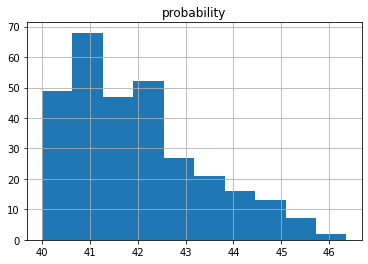

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
!pip install matplotlib==3.1.3

print("Number of buildings detected at accuracy of >=40% : ", len(detection_dict['image_detected_1.jpg']))

# Create a dataframe with pandas

statistics_dict = dict(probability=np.array(detection_probability['image_detected_1.jpg']))
stats_dataframe = pd.DataFrame(data=statistics_dict) # Convert to a dataframe

probability_stats = stats_dataframe.describe()
print(probability_stats)

pd.DataFrame.hist(data=stats_dataframe, column="probability")
# probably also accuracy and standard deviation

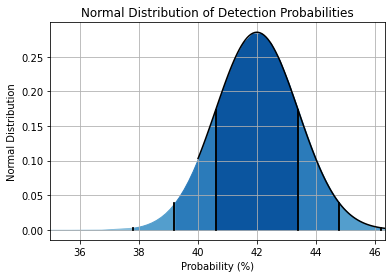

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = probability_stats.loc['min', 'probability']
x_max = probability_stats.loc['max', 'probability']

mean = probability_stats.loc['mean', 'probability'] 
std = probability_stats.loc['std', 'probability']

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

#----------------------------------------------------------------------------------------#
# fill area 1

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 2

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 3

pt1 = mean - std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 4

pt1 = mean + 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 5

pt1 = mean - 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 6

pt1 = mean + 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 10.0 *std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 7

pt1 = mean - 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 10.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

#----------------------------------------------------------------------------------------#

plt.grid()

plt.xlim(35,x_max)
# plt.ylim(0,0.25)

plt.title('Normal Distribution of Detection Probabilities',fontsize=12)

plt.xlabel('Probability (%)')
plt.ylabel('Normal Distribution')

plt.savefig("normal_distribution_2.png")
plt.show()

### Testing Coordinates on a detected Non Spatial Image

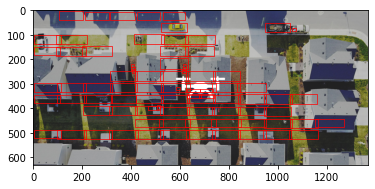

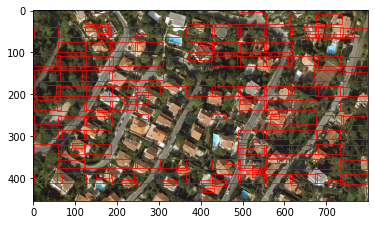

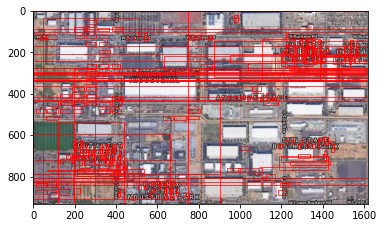

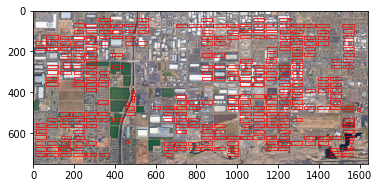

In [ ]:

# Work on Putting sample coordinates on an image
# https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image

!pip install matplotlib==3.1.3 # If Error Uncomment

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

#Cropping bounding images
# https://stackoverflow.com/questions/41909408/crop-a-bounding-box-from-an-image-which-is-a-numpy-array

for index, img_path in enumerate(input_image):

  im = Image.open(img_path)

  # Create figure and axes
  fig, ax = plt.subplots()

  # Display the image
  ax.imshow(im)

  # Create a Rectangle patch
  for rect_coords in detection_dict[f'image_detected_{index+1}.jpg']:
    # if rect_coords == [202, 672, 420, 799]: # Test statement
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
    # https://stackoverflow.com/questions/10177308/how-to-get-width-and-height-of-the-bounding-box-of-a-rotated-rectangle
    # for the rectangle from detection it is x1,y1,x2,y2
    # For the patch it is Rectangle(xy, width, height, angle=0.0, **kwargs)
    # rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')
    
    # width = x2 - x1
    # height = y2 - y1
    width = rect_coords[2] - rect_coords[0]
    height = rect_coords[3] - rect_coords[1]
    rect = patches.Rectangle((rect_coords[0], rect_coords[1]), width, height, linewidth=0.7, edgecolor='r', facecolor='none')
  
    # Add the patch to the Axes
    ax.add_patch(rect)

  plt.show()


# Rasterio Implementation
# https://towardsdatascience.com/reading-and-visualizing-geotiff-images-with-python-8dcca7a74510#:~:text=Examples%20of%20these%20libraries%20are,tiff%2C%20.

### Evaluating the model

In [ ]:
# # So we need to lower the loss so the model is better
# Evaluation of the Model


# #####################################################################
# DO NOT RUN AS YET
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="datasets_objs")
# metrics = trainer.evaluateModel(model_path='models/', json_path="configs/detection_config.json") #, iou_threshold=0.5, object_threshold=0.3, nms_threshold=0.5)
metrics = trainer.evaluateModel(model_path='models/', json_path="datasets_objs/json/detection_config.json", iou_threshold=0.1, object_threshold=0.1, nms_threshold=0.1)
# #################################################################

Starting Model evaluation....
Evaluating over 2 samples taken from datasets_objs/validation
Training over 7 samples  given at datasets_objs/train
skipping the evaluation of models/.ipynb_checkpoints since it's not a .h5 file
Model File:  models/best_model_so_far.h5 

Evaluation samples:  2
Using IoU:  0.1
Using Object Threshold:  0.1
Using Non-Maximum Suppression:  0.1
building: 0.3848
mAP: 0.3848
Model File:  models/detection_model-ex-013--loss-0095.995.h5 

Evaluation samples:  2
Using IoU:  0.1
Using Object Threshold:  0.1
Using Non-Maximum Suppression:  0.1
building: 0.1832
mAP: 0.1832
Model File:  models/detection_model-ex-023--loss-0107.541.h5 

Evaluation samples:  2
Using IoU:  0.1
Using Object Threshold:  0.1
Using Non-Maximum Suppression:  0.1
building: 0.1350
mAP: 0.1350
Model File:  models/pretrained-yolov3.h5 

Evaluation samples:  2
Using IoU:  0.1
Using Object Threshold:  0.1
Using Non-Maximum Suppression:  0.1
building: 0.0097
mAP: 0.0097
skipping the evaluation of mode

### Non Spatial Image Dimensions

In [ ]:
# Now the Next Idea is to transform the bounding boxes into lat, long coords
# So I need pixel coords -> Lat, Long
# https://www.codementor.io/@innat_2k14/image-data-analysis-using-numpy-opencv-part-1-kfadbafx6
import imageio
!pip install imagecodecs
import imagecodecs
from PIL import Image

print(input_image[-1])

pic = imagecodecs.imread(input_image[-1]) # We need this for tiff
pic2 = Image.open(input_image[-1])
img_height = pic.shape[0]
img_width = pic.shape[1]
print('Type of the image : ' , type(pic))
print()
print('Shape of the image : {}'.format(pic.shape))
print('Image Height {}'.format(img_height))
print('Image Width {}'.format(img_width))
print('Dimension of Image {}'.format(pic.ndim))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

# A specific pixel located at Row : 100 ; Column : 50 
# Each channel's value of it, gradually R , G , B
print('Value of only R channel {}'.format(pic[ 100, 50, 0])) # 0 for red
print('Value of only G channel {}'.format(pic[ 100, 50, 1])) # 1 for green
print('Value of only B channel {}'.format(pic[ 100, 50, 2])) # 2 for blue

image_pixels = list(pic2.getdata()) # Pixels of the image

# CALCULATING THE BOUNDING BOX FOR REGIONS OF INTEREST

# But if you are getting info from GEE for a rectangle bound
# Choose the geometry index [1] and geometry index [3]

# latlong_lower_right_pnt_out = [33.42236761147335,-112.14316314471057]
latlong_lower_right_pnt_out = [33.40747360301728,-112.1090281142399]
# latlong_upper_left_pnt_out = [33.439200701503495, -112.17796748888782]
latlong_upper_left_pnt_out = [33.45152680771909, -112.22103716270182]

diff_lat_out = latlong_upper_left_pnt_out[0] - latlong_lower_right_pnt_out[0]
diff_long_out = latlong_upper_left_pnt_out[1] - latlong_lower_right_pnt_out[1]


# Additional Calculations to finish the rectangular bound

latlong_upper_right_pnt_out = latlong_lower_right_pnt_out.copy() 
latlong_upper_right_pnt_out[0] = latlong_upper_right_pnt_out[0] + diff_lat_out # We add to the latitude

latlong_lower_left_pnt_out = latlong_lower_right_pnt_out.copy()
latlong_lower_left_pnt_out[1] = latlong_lower_left_pnt_out[1] + diff_long_out

print(f"lower_left:{latlong_lower_left_pnt_out}, upper_left:{latlong_upper_left_pnt_out}, lower_right:{latlong_lower_right_pnt_out},  upper_right:{latlong_upper_right_pnt_out}")



datasets_objs/images_here/Object_Detection_Study_Area_RGB.JPG
Type of the image :  <class 'numpy.ndarray'>

Shape of the image : (751, 1641, 3)
Image Height 751
Image Width 1641
Dimension of Image 3
Maximum RGB value in this image 255
Minimum RGB value in this image 0
Value of only R channel 154
Value of only G channel 136
Value of only B channel 136
lower_left:[33.40747360301728, -112.22103716270182], upper_left:[33.45152680771909, -112.22103716270182], lower_right:[33.40747360301728, -112.1090281142399],  upper_right:[33.45152680771909, -112.1090281142399]


In [ ]:
# Directly FROM EARTH ENGINE
direct_bounds = [[-112.22103716270182,33.40747360301728],
[-112.1090281142399,33.40747360301728], # min
[-112.1090281142399,33.45152680771909],
[-112.22103716270182,33.45152680771909], #max
[-112.22103716270182,33.40747360301728]]

### Convert Pixel (x, y) to WGS84 (Lat, Long)

In [ ]:

# Now From Here we can calculate the grid locations of the images

def calculate_other_coords(latlong_upper_left_pnt: list, latlong_lower_right_pnt: list):
  """
  This function deals with the calculations of the rest of the coordinates
  """

  print(f"lower_right:{latlong_lower_right_pnt}, upper_left:{latlong_upper_left_pnt}")

  diff_lat = latlong_upper_left_pnt[0] - latlong_lower_right_pnt[0]
  diff_long = latlong_upper_left_pnt[1] - latlong_lower_right_pnt[1]

  print(f"Lat Difference: {diff_lat}, Long Difference: {diff_long}")

  # Fixing the LAT
  latlong_upper_right_pnt = latlong_lower_right_pnt.copy()
  latlong_upper_right_pnt[0] = latlong_upper_right_pnt[0] + diff_lat # We add to the latitude

  # Fixing the LONG
  latlong_lower_left_pnt = latlong_lower_right_pnt.copy()
  latlong_lower_left_pnt[1] = latlong_lower_left_pnt[1] + diff_long # We add to longitude

  # format is lower_left, lower_right, upper_right, upper_left
  detected_box = [latlong_lower_left_pnt, 
             latlong_lower_right_pnt, 
             latlong_upper_right_pnt,
             latlong_upper_left_pnt,
             latlong_lower_left_pnt.copy(), # Close out the feature (do copy to avoid mutation)
             ]
  return detected_box

def calculate_box(box_pixels:list) -> list:
  """ This function will return the latitude and logitude coordinates of 
  a geometry
  """

  x1 = box_pixels[0] # (min x pixel coord)
  y1 = box_pixels[1] # (min y pixel coord)

  x2 = box_pixels[2] # (max x pixel coord)
  y2 = box_pixels[3] # (max y pixel coord)

  # Base_start_axis is the coords of the max point in boundary (lat, long)
  # It is also (0,0) for the pixel(x,y) of the image (images grow down)
  base_start_axis = latlong_upper_left_pnt_out 

  # calc the ratios (We use this to determine a value between 0 to 1)

  # X ratios (X is long)
  x1_ratio = x1/img_width
  x2_ratio = x2/img_width

  # Y ratios (Y is Lat)
  y1_ratio = y1/img_height
  y2_ratio = y2/img_height

  # Using no subtraction of 1
  # Calc longs 
  x1_to_long = base_start_axis[1] - (diff_long_out * (x1_ratio))
  x2_to_long = base_start_axis[1] - (diff_long_out * (x2_ratio))

  # Calc Lats
  y1_to_lat = base_start_axis[0] - (diff_lat_out * (y1_ratio))
  y2_to_lat = base_start_axis[0] - (diff_lat_out * (y2_ratio))


  # print(f"Test for X1 Ratio: {x1_ratio} , Diff: {diff_lat * x1_ratio}, and Coord_Incrementer: {x1_to_lat}, Original= {base_start_axis[0]}")
  # print(f"Test for X2 Ratio: {x2_ratio} , Diff: {diff_lat * x2_ratio}, and Coord_Incrementer: {x2_to_lat}, Original= {base_start_axis[0]}")
  
  # print(f"Test for Y1 Ratio: {y1_ratio} , Diff: {diff_long * y1_ratio}, and Coord_Incrementer: {y1_to_long}, Original= {base_start_axis[1]}")
  # print(f"Test for Y2 Ratio: {y2_ratio} , Diff: {diff_long * y2_ratio}, and Coord_Incrementer: {y2_to_long}, Original= {base_start_axis[1]}")

  # print(f"New Coord is less than base coord x = {abs(base_start_axis[0]) > x1_to_lat}, y = {abs(base_start_axis[1]) > y1_to_long} ")

  print("Box Pixels", box_pixels)
  print(f"Test for X1 Ratio: {x1_ratio} , Diff: {diff_lat_out * x1_ratio}, and Coord_Incrementer: {x1_to_long}, Original= {base_start_axis[1]}")
  print(f"Test for X2 Ratio: {x2_ratio} , Diff: {diff_lat_out * x2_ratio}, and Coord_Incrementer: {x2_to_long}, Original= {base_start_axis[1]}")
  
  print(f"Test for Y1 Ratio: {y1_ratio} , Diff: {diff_long_out * y1_ratio}, and Coord_Incrementer: {y1_to_lat}, Original= {base_start_axis[0]}")
  print(f"Test for Y2 Ratio: {y2_ratio} , Diff: {diff_long_out * y2_ratio}, and Coord_Incrementer: {y2_to_lat}, Original= {base_start_axis[0]}")

  print(f"New Coord is less than base coord x = {abs(base_start_axis[1]) > x1_to_long}, y = {abs(base_start_axis[0]) > y1_to_lat} ")

  # Calculate Rest of Box

  # long_lat1_pnt = [x1_to_lat, y1_to_long] # lower right or the min
  # long_lat2_pnt = [x2_to_lat, y2_to_long] # upper left or the max

  long_lat1_pnt = [y1_to_lat, x1_to_long] # lower right or the min
  long_lat2_pnt = [y2_to_lat, x2_to_long] # upper left or the max
  
  
  object_detect_box = calculate_other_coords(long_lat2_pnt, long_lat1_pnt)

  
  print("Detection box: ", object_detect_box)

  return object_detect_box



### CHOOSE A SET/LIST OF DETECTED OBJECT BOXES TO BE USED. LET THIS BE A SUPERVISED PROCESS

In [ ]:
#################################################
# Actual BOXES FROM THE DETECTION
detected_objects_supervised = detection_dict[list(detection_dict.keys())[-1]]
test_box = [calculate_box(detected_object) for detected_object in detected_objects_supervised] # THE DETECTED BOXes WGS84 (lat, long) coords



x1 height:320, img height:751
Box Pixels [320, 35, 377, 49]
Test for X1 Ratio: 0.19500304692260817 , Diff: 0.008590509143558505, and Coord_Incrementer: -112.19919505696885, Original= -112.22103716270182
Test for X2 Ratio: 0.22973796465569774 , Diff: 0.010120693584754863, and Coord_Incrementer: -112.19530443188516, Original= -112.22103716270182
Test for Y1 Ratio: 0.04660452729693742 , Diff: -0.00522012875654726, and Coord_Incrementer: 33.449473728938045, Original= 33.45152680771909
Test for Y2 Ratio: 0.06524633821571238 , Diff: -0.007308180259166163, and Coord_Incrementer: 33.448652497425634, Original= 33.45152680771909
New Coord is less than base coord x = True, y = True 
lower_right:[33.449473728938045, -112.19919505696885], upper_left:[33.448652497425634, -112.19530443188516]
Lat Difference: -0.0008212315124112024, Long Difference: 0.00389062508368454
Detection box:  [[33.449473728938045, -112.19530443188516], [33.449473728938045, -112.19919505696885], [33.448652497425634, -112.19919

### Reverse the Coordinates of the Boxes to be Long, Lat format and not the opposite

In [ ]:
# Here We are going to create a Feature Collection from all the fetection boxes

def reverse_coords(coords_pair_lists):
  """ Reverse our Coordinates for other softwares to use properly, Feature Col and GEE"""
  reversed_coords = []

  for coords_pair in coords_pair_lists:
    new_coords = []
    length = len(coords_pair)

    for i in range(length):
      coord_pair = coords_pair[i]
      temp = [coord_pair[1], coord_pair[0]]
      new_coords.append(temp)

    reversed_coords.append(new_coords)

  return reversed_coords

test_box_updated = reverse_coords(test_box)


### Constructe GEOJSON FEATURE COLLECTION FROM THE COORDINATE DETECTED BOXES

In [ ]:
obj_featureCol = dict(type="FeatureCollection", features=[])
import json
for detected_box in test_box_updated:
  polygon_geojson = {
      "type": "Feature",
      'properties': {'highlight': json.dumps({}), 'style': json.dumps({})},
      "geometry": {
        "type": "Polygon",
        "coordinates": [detected_box]
      }
    }
  obj_featureCol['features'].append(polygon_geojson)

print(obj_featureCol)



{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'highlight': '{}', 'style': '{}'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-112.19530443188516, 33.449473728938045], [-112.19919505696885, 33.449473728938045], [-112.19919505696885, 33.448652497425634], [-112.19530443188516, 33.448652497425634], [-112.19530443188516, 33.449473728938045]]]}}, {'type': 'Feature', 'properties': {'highlight': '{}', 'style': '{}'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-112.1827452210887, 33.4494150695443], [-112.18636281985071, 33.4494150695443], [-112.18636281985071, 33.448535178638146], [-112.1827452210887, 33.448535178638146], [-112.1827452210887, 33.4494150695443]]]}}, {'type': 'Feature', 'properties': {'highlight': '{}', 'style': '{}'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-112.16110788509697, 33.4494150695443], [-112.16486199701983, 33.4494150695443], [-112.16486199701983, 33.44859383803189], [-112.16110788509697, 33.44859383803189], [-112

### Add Non Spatial Image and Detected Boxes to Folium Map 

In [ ]:
# PHOENIX RECALCULATIONS
# ee.Image.cat ??
# # https://developers.google.com/earth-engine/guides/reducers_reduce_regions
# https://developers.google.com/earth-engine/apidocs/ee-image-pixellonlat

import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)
  

# Add EE drawing method to folium map.
folium.Map.add_ee_layer = add_ee_layer

phoenix_map = folium.Map(location=[33.42204524385143, -112.17792457354358], zoom_start=14)


# Workflow 
# https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/ImageOverlay.ipynb

# Overlay the Clipped image
img = folium.raster_layers.ImageOverlay(
        name="Trial Detect Image",
        image=input_image[-1],
        bounds=[latlong_lower_right_pnt_out, 
                latlong_upper_left_pnt_out],
        opacity=0.8,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )
img.add_to(phoenix_map)

# Add the converted detected boxes to the Folium map
detected = folium.features.GeoJson(
    data=obj_featureCol,
    name="Detected Objects"
)
detected.add_to(phoenix_map)



phoenix_map



## GOOGLE EARTH ENGINE WAY

In [ ]:

# Google Earth Engine Method (Some Tips Here in the code editor)
# https://code.earthengine.google.com/af976bcd1dbd1c64ec8a73f4d9aabf65
# https://developers.google.com/earth-engine/apidocs/ee-image-gt

import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=9iMkk0WTLqP0SIrfNgdS79vYKiOON1O_7R15xgrYFOk&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g7qrf-8AUMJH07MbSDHL64MAxmvCDy4CJjCpbf8cznhhbpK_Y2DgP0

Successfully saved authorization token.


In [ ]:
# https://developers.google.com/earth-engine/guides/python_install-colab
# Import libraries.

# TEST 1
import folium


# Fetch an elevation model.
dem = ee.Image('USGS/SRTMGL1_003')
# dem = ee.Image("users/gioharvey14/L7_2013_thermal").select('B6_VCID_1') This worked

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}


# Add the elevation model to the map object.
phoenix_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')



# Display the map.
display(phoenix_map)

# phoenix_map.save("index.html")

### LETS TRANSFORM OUR IMAGE PATHS FROM ASSET INTO AN EE.IMAGE OBJECT



In [ ]:
# Grab all bands from the asset folder

ls8_assets_thermal = [
                            "users/gioharvey14/LandsatThermalYearly/L8_2013_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L8_2014_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L8_2015_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L8_2016_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L8_2017_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L8_2018_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L8_2019_thermal",
]

ls7_assets_thermal = [
                            "users/gioharvey14/LandsatThermalYearly/L7_2010_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L7_2011_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L7_2012_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L7_2013_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L7_2014_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L7_2015_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L7_2016_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L7_2017_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L7_2018_thermal",
                            "users/gioharvey14/LandsatThermalYearly/L7_2019_thermal",
]


def generateImagery(image_year_list):
  imagery_list = [ee.Image(image_asset) for image_asset in image_year_list]
  return imagery_list

ls8_images = generateImagery(ls8_assets_thermal)
ls7_images = generateImagery(ls7_assets_thermal)

### LETS ADD THOSE Landsat 7 and 8 Thermal Band Images to the map

In [ ]:
# Add layers to map

def addImageLayers(image_layers_dict):
  
  vis_params = {
  'min': 0,
  'max':400,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

  for landsat in image_layers_dict:
    if landsat == 'L8':
      start = 2013
    else:
      start = 2010
    
    image_layers = image_layers_dict[landsat]

    for index, image in enumerate(image_layers):
      bands = image.bandNames().getInfo() # Be two bands
      # print(image.select(bands[0]).getInfo())
      phoenix_map.add_ee_layer(image.select(bands[0]), vis_params, f'{start+index}_{bands[0]}{landsat}')
      phoenix_map.add_ee_layer(image.select(bands[1]), vis_params, f'{start+index}_{bands[1]}{landsat}')

  phoenix_map.add_child(folium.LayerControl())

# We Combine all the Layers
layers_dict = {
    "L8" : ls8_images,
    "L7" : ls7_images,
}

addImageLayers(layers_dict)



display(phoenix_map)

### TIME TO WORK ON THE MITIGATION OF The Images

- We are going to reduce the thermal value for each bands on a year by year basis for each image band
- To do this we will import the csv file with our data

In [ ]:
# We take a copy of the pixel values from Google Drive
!cp drive/MyDrive/ML_dataset/thermal_pixels/TIR_values_L7_L8.xlsx tir_values_l7_l8.xlsx

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html


import pandas as pd
sheet_names = ["Landsat7_tir", "Landsat8_tir"]

# Excel Sheets
l7_pixel_range = pd.read_excel("tir_values_l7_l8.xlsx",sheet_names[0])
l8_pixel_range = pd.read_excel("tir_values_l7_l8.xlsx",sheet_names[1])



### Next we use the columns for image mitigations

In [ ]:
from random import randint

################################################################################
# Reduce Images to access check for change from new bands
def reduceImage(image, geometry):
  # Reduce the region. The region parameter is the Feature geometry.
  # Able to reduce an image for all the bands

  meanImage = image.reduceRegion(
    reducer = ee.Reducer.mean(),
    geometry = geometry,
    scale = 30,
    maxPixels = 1e9
  );


  # The result is a Dictionary.  Print it.
  return meanImage.getInfo();

################################################################################

################################################################################
# FOR INDIVIDUAL BANDS OF AN IMAGE TO CREATE NEW IMAGE
def recalculate_bands(image, range_col_names, range_sheet, satellite_name=None):
  """Here We Change the pixel values within the clipped bound

    Parameters:
      image: The clipped image based off a selected band
      range_col_names: The different pixel values column names i.e vegetation, water
      range_sheet: The columns with the pixel values

      *** Note for Landsat 7 divide column values by 10 for correction measures ***
  """

  image_pixel_altered = {} # We are going to put the different image alterations here

  for name in range_col_names:
    # https://developers.google.com/earth-engine/guides/reducers_reduce_region
    sheet_column = list(range_sheet[name]) # Get the specific column
    random_pixel = sheet_column[randint(0, len(sheet_column)-1)] # Get a random number in the range

    # The best way to solve this is to subtract the image from it self to get 0 then add the value
    if satellite_name == 'L7':
      computed_mitigated_image = image.subtract(image).add(random_pixel).divide(10)
    else: 
      computed_mitigated_image = image.subtract(image).add(random_pixel)

    image_pixel_altered[name] = computed_mitigated_image # The new clipped image

  return image_pixel_altered
################################################################################

################################################################################
# Reconstructing images to original form
def imageReconstructor(dictImages):
  """Take a Dictionary of separated bands and modified Pixel Values
  and merge each into one image.

  For example band 1 - Vegetation image and Water image
  For example band 2 - Vegetation image and Water image

  New Image with band 1 and 2 - Vegetation
  New Image with band 1 and 2 - Water

  # Since We have 2 bands lets keep this function for just those 2
  """


  vegetationImage = None
  waterImage = None
  
  for bandname in dictImages:

    bandImage = dictImages[bandname]
    
    for pixel_column in bandImage:

      if pixel_column == 'Vegetation':
        if vegetationImage is None:
          vegetationImage = bandImage[pixel_column]
        else:
          vegetationImage.addBands(bandImage[pixel_column], bandImage[pixel_column].bandNames())

      elif pixel_column == 'Water':
        if waterImage is None:
          waterImage = bandImage[pixel_column]
        else:
          waterImage.addBands(bandImage[pixel_column], bandImage[pixel_column].bandNames())
  
  print([vegetationImage, waterImage])
  return [vegetationImage, waterImage]
################################################################################

################################################################################
# FOR SINGLE IMAGES WITH THEIR BANDS
def imageMitigator(image, detected_bound, pixel_range_sheet, satellite_name=None):
  """For Mitigating our images by changing the pixel values
  Parameters:
    image_path: The image path in the assets
    bound: A detected object (for eg. a building)
    pixel_range_sheel: The satellite image range
  
  Old Returns:
    dict:
      image_band:
        dict:
          pixel_change_col_1
          .
          .
          .
          pixel_change_col_n

  New Returns:
    List:
      ee.Image (original bands):
        pixel column
  """
  bands = image.bandNames().getInfo()
  images_by_band = {}

  for band in bands:# Loop by Bands
    
    # Clipped Image
    image_band_selected = image.select(band)
    clipped_meanLstImage = image_band_selected.clip(detected_bound) # We clip our image

    # Mitigate the image

    # Get the column names 
    column_names = list(pixel_range_sheet.columns)

    images_by_band[band] = recalculate_bands(image, column_names, pixel_range_sheet, satellite_name)
  
  
  # Reconstruct the Image
  pixel_class_images = imageReconstructor(images_by_band)


  return pixel_class_images 
################################################################################

In [ ]:
# Here We DO A TEST FOR AN IMAGE FOR ONE YEAR
# test_box_updated Has the detected box


test_poly = ee.Geometry.Polygon(test_box_updated[0])


temp = imageMitigator(ls7_images[0], test_poly, l7_pixel_range, 'L7')

# Note These are Clipped Images
print("Original Image", reduceImage(ls7_images[0].clip(test_poly), test_poly))

print("Vegetation  Image with Changed Pixel Values", reduceImage(temp[0], test_poly))
print("Water  Image with Changed Pixel Values", reduceImage(temp[1], test_poly))

# Entire Image Area (PHOENIX IN OUR EXAMPLE)
phoenix_collection = ee.FeatureCollection('users/camillebustosss/Phoenix_Villages-polygon')

vegetation_combined_img = ee.ImageCollection([ls7_images[0],temp[0]]).mosaic();
water_combined_img = ee.ImageCollection([ls7_images[0],temp[1]]).mosaic();
print("\n")
print("Original Image", reduceImage(ls7_images[0], phoenix_collection))
print("FULL AREA Vegetation  Image with Changed Pixel Values", reduceImage(vegetation_combined_img, phoenix_collection))
print("FULL AREA Water  Image with Changed Pixel Values", reduceImage(water_combined_img, phoenix_collection))

[<ee.image.Image object at 0x7fcb6031d850>, <ee.image.Image object at 0x7fca6464bf10>]
Original Image {'B6_VCID_1': 303.4929680879975, 'B6_VCID_2': 303.3119286346333}
Vegetation  Image with Changed Pixel Values {'B6_VCID_1': 298.4666, 'B6_VCID_2': 298.4666}
Water  Image with Changed Pixel Values {'B6_VCID_1': 291.57669999999996, 'B6_VCID_2': 291.57669999999996}


Original Image {'B6_VCID_1': 301.76701187356394, 'B6_VCID_2': 301.7483900012765}
FULL AREA Vegetation  Image with Changed Pixel Values {'B6_VCID_1': 298.46661376953125, 'B6_VCID_2': 298.46661376953125}
FULL AREA Water  Image with Changed Pixel Values {'B6_VCID_1': 291.5766906738281, 'B6_VCID_2': 291.5766906738281}


### Lets Calculate the Yearly Mitigation for each Satellite

In [ ]:
# Create A FEATURE COLLECTION FROM OUR DETECTED OBJECTS

# The Feature Collection
detected_objects_fc = ee.FeatureCollection(obj_featureCol)

{'columns': {'highlight': 'String',
  'style': 'String',
  'system:index': 'String'},
 'features': [{'geometry': {'coordinates': [[[-112.19919505696885,
       33.448652497425634],
      [-112.19530443188516, 33.448652497425634],
      [-112.19530443188516, 33.449473728938045],
      [-112.19919505696885, 33.449473728938045],
      [-112.19919505696885, 33.448652497425634]]],
    'type': 'Polygon'},
   'id': '0',
   'properties': {'highlight': '{}', 'style': '{}'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-112.18636281985071, 33.448535178638146],
      [-112.1827452210887, 33.448535178638146],
      [-112.1827452210887, 33.4494150695443],
      [-112.18636281985071, 33.4494150695443],
      [-112.18636281985071, 33.448535178638146]]],
    'type': 'Polygon'},
   'id': '1',
   'properties': {'highlight': '{}', 'style': '{}'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-112.16486199701983, 33.44859383803189],
      [-112.16110788509697, 33.44859383803189],
  

In [ ]:
# For Landsat 7

def printReductions(image, bound, clipped_mitigatedImages, vegetation_combined_img, water_combined_img):
  # Note These are Clipped Images
  print("Original Image", reduceImage(image.clip(bound), bound))

  print("Vegetation  Image with Changed Pixel Values", reduceImage(clipped_mitigatedImages[0], bound))
  print("Water  Image with Changed Pixel Values", reduceImage(clipped_mitigatedImages[1], bound))

  # Entire Image Area (PHOENIX IN OUR EXAMPLE)
  phoenix_collection = ee.FeatureCollection('users/camillebustosss/Phoenix_Villages-polygon')

  print("Full Original Image", reduceImage(image, phoenix_collection))
  print("FULL AREA Vegetation  Image with Changed Pixel Values", reduceImage(vegetation_combined_img, phoenix_collection))
  print("FULL AREA Water  Image with Changed Pixel Values", reduceImage(water_combined_img, phoenix_collection))

def mitigatedImages(year:int, imageCollection: list, detected_features: list, pixel_range: list, satellite_name=None):
  vege_mitigated_image_years = {}
  water_mitigated_image_years = {}

  # check_collection = imageCollection.copy() # Additional for verification
  
  for index, image in enumerate(imageCollection):
    if satellite_name=='L7':
      static_image = ee.Image(ls7_assets_thermal[index])
    else: 
      static_image = ee.Image(ls8_assets_thermal[index])

    print(f"Year : {index+year}")

    # The Image per base of detection

    clipped_mitigated_images = imageMitigator(image, detected_features, pixel_range, satellite_name)


    # Create Mosaiced image (original + mitigated imagery)
    # vegetation_mitigated_image = ee.ImageCollection([image, clipped_mitigated_images[0]]).mosaic();
    vegetation_mitigated_image = ee.ImageCollection([static_image, clipped_mitigated_images[0]])

    # water_mitigated_image = ee.ImageCollection([image, clipped_mitigated_images[1]]).mosaic();
    water_mitigated_image = ee.ImageCollection([static_image, clipped_mitigated_images[1]])

    # Mean Reductions
    printReductions(image, detected_features, clipped_mitigated_images, 
                    vegetation_mitigated_image.mosaic(), water_mitigated_image.mosaic())

    # SAVE VALUES
    vege_mitigated_image_years[year+index] = vegetation_mitigated_image.mosaic()
    water_mitigated_image_years[year+index] = water_mitigated_image.mosaic()

  print(f"END OF {satellite_name}\n")
  return [vege_mitigated_image_years, water_mitigated_image_years]

# Note fix up test_poly to be a Feature Collection of Detected Objects
# We have 10 Years
l7_mitigated = mitigatedImages(2010, ls7_images.copy(), detected_objects_fc, l7_pixel_range, 'L7')

# We have 7 Years
l8_mitigated = mitigatedImages(2013, ls8_images.copy(), detected_objects_fc, l8_pixel_range, 'L8')


Year : 2010
[<ee.image.Image object at 0x7f3eee1f5610>, <ee.image.Image object at 0x7f3eee34c210>]
Original Image {'B6_VCID_1': 302.01522685094164, 'B6_VCID_2': 301.9806105640537}
Vegetation  Image with Changed Pixel Values {'B6_VCID_1': 307.35790000000003, 'B6_VCID_2': 307.35790000000003}
Water  Image with Changed Pixel Values {'B6_VCID_1': 299.2163, 'B6_VCID_2': 299.2163}
Full Original Image {'B6_VCID_1': 301.767011873564, 'B6_VCID_2': 301.74839000127656}
FULL AREA Vegetation  Image with Changed Pixel Values {'B6_VCID_1': 307.35791015625, 'B6_VCID_2': 307.35791015625}
FULL AREA Water  Image with Changed Pixel Values {'B6_VCID_1': 299.21630859375, 'B6_VCID_2': 299.21630859375}
Year : 2011
[<ee.image.Image object at 0x7f3eee24e490>, <ee.image.Image object at 0x7f3eee24e990>]
Original Image {'B6_VCID_1': 304.2075885484833, 'B6_VCID_2': 304.13682189839074}
Vegetation  Image with Changed Pixel Values {'B6_VCID_1': 298.4666, 'B6_VCID_2': 298.4666}
Water  Image with Changed Pixel Values {'B

### EXPORT IMAGES BACK INTO THE ASSET FOLDER

### Authenticate Earth Engine

In [ ]:
!earthengine authenticate 

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=JbzQ1kP71BWGKbbFy0G2x7PScHKIUrVFEoPGBY8N6UA&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g52F2dPmc-Tf_rah1QmZRhtVkrKdS7bLtf8ELL8tR24KH4aijU9jWo

Successfully saved authorization token.


### Authenticate to Google Cloud

In [ ]:
from google.colab import auth
auth.authenticate_user()



In [ ]:
import ee
ee.Initialize()

In [ ]:
# Export the Detected Object Bounds
import time

# https://gis.stackexchange.com/questions/359719/unable-to-encode-list-data-type-as-attribute-when-export-featurecollection
assetId = f'Detected_Feature_bounds'
asset_folder = f"users/gioharvey14/{assetId}"

task_features = ee.batch.Export.table.toAsset(
    collection=detected_objects_fc, 
    description=assetId, 
    assetId=asset_folder)

task_features.start()

print("\n Starting Task For Detected Bounds")
while task_features.active():
  print('Polling for task (id: {}).'.format(task_features.id))
  time.sleep(5)
  print(task_features.status())

print("Ending Task For Detected Bounds\n")	


 Starting Task For Detected Bounds
Polling for task (id: LKPZYHBTTFFHIXXSRE2OFLID).
{'state': 'READY', 'description': 'Detected_Feature_bounds', 'creation_timestamp_ms': 1616823877309, 'update_timestamp_ms': 1616823877309, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_FEATURES', 'id': 'LKPZYHBTTFFHIXXSRE2OFLID', 'name': 'projects/earthengine-legacy/operations/LKPZYHBTTFFHIXXSRE2OFLID'}
Polling for task (id: LKPZYHBTTFFHIXXSRE2OFLID).
{'state': 'READY', 'description': 'Detected_Feature_bounds', 'creation_timestamp_ms': 1616823877309, 'update_timestamp_ms': 1616823877309, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_FEATURES', 'id': 'LKPZYHBTTFFHIXXSRE2OFLID', 'name': 'projects/earthengine-legacy/operations/LKPZYHBTTFFHIXXSRE2OFLID'}
Polling for task (id: LKPZYHBTTFFHIXXSRE2OFLID).
{'state': 'READY', 'description': 'Detected_Feature_bounds', 'creation_timestamp_ms': 1616823877309, 'update_timestamp_ms': 1616823877309, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_FEATURES', 'id': 'LKPZ

### Export to Asset

In [ ]:
import time

# Currently only the detected box is being exported for an image
# Have to figure out why

def exportImagery(type_col: str, satellite_name: str, images:dict, geometry:ee.FeatureCollection):
  """Exporting Modified images back as assets into Google Earth Engine.

  To Separate them on the basis of vegetation and water

  """
  
  for year in images:
    description = f'TIR_Mitigated_{satellite_name}_{type_col}_{year}'
    assetId = f'TIR_Mitigated_{satellite_name}_{type_col}_{year}'

    if satellite_name == 'L7':
      asset_folder = f"users/gioharvey14/L7_mitigated/{assetId}"
    else:
      asset_folder = f"users/gioharvey14/L8_mitigated/{assetId}"


    # print("Collection Bands from TOA: ", imageCollection)
    # Export the TIR IMAGE FOR Images
    task = ee.batch.Export.image.toAsset(
      image=images[year],
      description=description,
      assetId=asset_folder,
      scale=30,
      region=geometry,
    )
    task.start()

    print("\n Starting Task For Image")
    while task.active():
      print('Polling for task (id: {}).'.format(task.id))
      time.sleep(5)
      print(task.status())
    
    print("Ending Task For Image\n")




# Landsat 7
# exportImagery('vegetation','L7', l7_mitigated[0], detected_objects_fc)
# exportImagery('water','L7', l7_mitigated[1], detected_objects_fc)
exportImagery('vegetation','L7', l7_mitigated[0], direct_bounds)
exportImagery('water','L7', l7_mitigated[1], direct_bounds)

# Mosaicked Image is not working in GEE

# Landsat 8
# exportImagery('vegetation','L8', l8_mitigated[0], detected_objects_fc)
# exportImagery('water','L8', l8_mitigated[1], detected_objects_fc)
exportImagery('vegetation','L8', l8_mitigated[0], direct_bounds)
exportImagery('water','L8', l8_mitigated[1], direct_bounds)





 Starting Task For Image
Polling for task (id: NXUUZ3CPBUGEOVCA6G6O3TQM).
{'state': 'READY', 'description': 'TIR_Mitigated_L7_vegetation_2010', 'creation_timestamp_ms': 1616824219682, 'update_timestamp_ms': 1616824219682, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id': 'NXUUZ3CPBUGEOVCA6G6O3TQM', 'name': 'projects/earthengine-legacy/operations/NXUUZ3CPBUGEOVCA6G6O3TQM'}
Polling for task (id: NXUUZ3CPBUGEOVCA6G6O3TQM).
{'state': 'READY', 'description': 'TIR_Mitigated_L7_vegetation_2010', 'creation_timestamp_ms': 1616824219682, 'update_timestamp_ms': 1616824219682, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id': 'NXUUZ3CPBUGEOVCA6G6O3TQM', 'name': 'projects/earthengine-legacy/operations/NXUUZ3CPBUGEOVCA6G6O3TQM'}
Polling for task (id: NXUUZ3CPBUGEOVCA6G6O3TQM).
{'state': 'READY', 'description': 'TIR_Mitigated_L7_vegetation_2010', 'creation_timestamp_ms': 1616824219682, 'update_timestamp_ms': 1616824219682, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id

In [ ]:
# detected_objects_fc.getInfo()['features']
detected_objects_fc.getInfo()

{'columns': {'highlight': 'Dictionary<Object>',
  'style': 'Dictionary<Object>',
  'system:index': 'String'},
 'features': [{'geometry': {'coordinates': [[[-112.19919505696885,
       33.448652497425634],
      [-112.19530443188516, 33.448652497425634],
      [-112.19530443188516, 33.449473728938045],
      [-112.19919505696885, 33.449473728938045],
      [-112.19919505696885, 33.448652497425634]]],
    'type': 'Polygon'},
   'id': '0',
   'properties': {'highlight': {}, 'style': {}},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-112.18636281985071, 33.448535178638146],
      [-112.1827452210887, 33.448535178638146],
      [-112.1827452210887, 33.4494150695443],
      [-112.18636281985071, 33.4494150695443],
      [-112.18636281985071, 33.448535178638146]]],
    'type': 'Polygon'},
   'id': '1',
   'properties': {'highlight': {}, 'style': {}},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-112.16486199701983, 33.44859383803189],
      [-112.16110788509697, 33.448

In [ ]:
# https://developers.google.com/earth-engine/reference/rest/v1alpha/projects.assets/listImages
# https://developers.google.com/identity/protocols/oauth2/service-account#httprest_1
# !curl 'https://earthengine.googleapis.com/v1alpha/{parent=projects/earthengine-legacy/assets/users/gioharvey14/L7_mitigated}:listImages'
# https://colab.research.google.com/github/csaybar/EEwPython/blob/dev/10_Export.ipynb


### Next Steps
- Need to redo the detected box so I load all instead of one which is done for testing currently (DONE)
- Export a test batch of the data as asset (Done)
- Have to mosaic in Earth engine code editor as the pythons mosaic() doesnt work
- Change this test batch into a image collection to use in the SMWAlgorithm file (Done)
- Fix detection transformation significant digits (Done)
- Alter Data Structures for image multiple detection instances (Done)


### GEE PYTHON REFERENCE
- [GEE PYTHON SYNTAX REFERENCE](https://developers.google.com/earth-engine/guides/python_install)

- [Manifest Uploads](https://developers.google.com/earth-engine/guides/image_manifest)

## Export our Map

In [ ]:
phoenix_map.save("index.html")